### 2. 유방암 데이터 - 차원축소, 군집화
  - 10, 5, 2 차원 차원 축소
  - 원본과 차원축소한 데이터의 분류(앙상블) 정확도 측정
  - 군집화하기
  - 2차원으로 축소한것은 시각화(오리지널, 군집 데이터)


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

array(['malignant', 'benign'], dtype='<U9')

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
cancer_std = StandardScaler().fit_transform(cancer.data)
df = pd.DataFrame(
    cancer_std, columns = cancer.feature_names
)
df["target"] = cancer.target

In [16]:
pca10 = PCA(n_components=10)
cancer_pca10 = pca10.fit_transform(cancer_std)
print(cancer_pca10[:3])
print(pca10.explained_variance_ratio_.sum())

[[ 9.19283683  1.94858307 -1.12316616  3.63373092 -1.19511013  1.41142457
   2.15937215 -0.39840556 -0.15709609 -0.87741577]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177497  0.02865634
   0.01335766  0.24098902 -0.7119085   1.10699964]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208269 -0.17708591  0.54145222
  -0.66816482  0.09737472  0.02408063  0.45426521]]
0.9515688143329056


In [17]:
pca5 = PCA(n_components=5)
cancer_pca5 = pca5.fit_transform(cancer_std)
print(cancer_pca5[:3])
print(pca5.explained_variance_ratio_.sum())

[[ 9.19283683  1.94858307 -1.123166    3.63372978 -1.1951106 ]
 [ 2.3878018  -3.76817175 -0.52929298  1.11826645  0.62177558]
 [ 5.73389628 -1.07517379 -0.55174729  0.91208014 -0.17708623]]
0.9515688143329056


In [22]:
pca2 = PCA(n_components=2)
cancer_pca2 = pca2.fit_transform(cancer_std)
print(cancer_pca2[:3])
print(pca2.explained_variance_ratio_.sum())

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]]
0.6324320765155946
569


In [25]:
pca2_df = pd.DataFrame(cancer_pca2)
pca5_df = pd.DataFrame(cancer_pca5)
pca10_df = pd.DataFrame(cancer_pca10)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [37]:
# 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify = cancer.target, random_state = 1018, test_size = 0.2
)
rfr1 = RandomForestRegressor(random_state = 1018)
rfr1.fit(X_train, y_train)
rfr1_score = rfr1.score(X_test, y_test)

In [38]:
# 2차원 차원축소
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2, cancer.target, stratify = cancer.target, random_state = 1018, test_size = 0.2
)
rfr2 = RandomForestRegressor(random_state = 1018)
rfr2.fit(X_train, y_train)
rfr2_score = rfr2.score(X_test, y_test)

In [39]:
# 5차원 차원축소
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5, cancer.target, stratify = cancer.target, random_state = 1018, test_size = 0.2
)
rfr3 = RandomForestRegressor(random_state = 1018)
rfr3.fit(X_train, y_train)
rfr3_score = rfr3.score(X_test, y_test)

In [40]:
# 10차원 차원 축소
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10, cancer.target, stratify = cancer.target, random_state = 1018, test_size = 0.2
)
rfr4 = RandomForestRegressor(random_state = 1018)
rfr4.fit(X_train, y_train)
rfr4_score = rfr4.score(X_test, y_test)

In [44]:
print("원본\t2차원\t5차원\t10차원")
print(f"{rfr1_score:.3f}\t{rfr2_score:.3f}\t{rfr3_score:.3f}\t{rfr4_score:.3f}\t")

원본	2차원	5차원	10차원
0.883	0.830	0.915	0.912	


In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 2, random_state = 1018)
kmean.fit_transform(cancer_pca2)
kmean.labels_

In [61]:
df_k = pd.DataFrame({
    "PC1" : cancer_pca2[:,0], "PC2" : cancer_pca2[:,1],
     "cluster":kmean.labels_, "target" : cancer.target
})

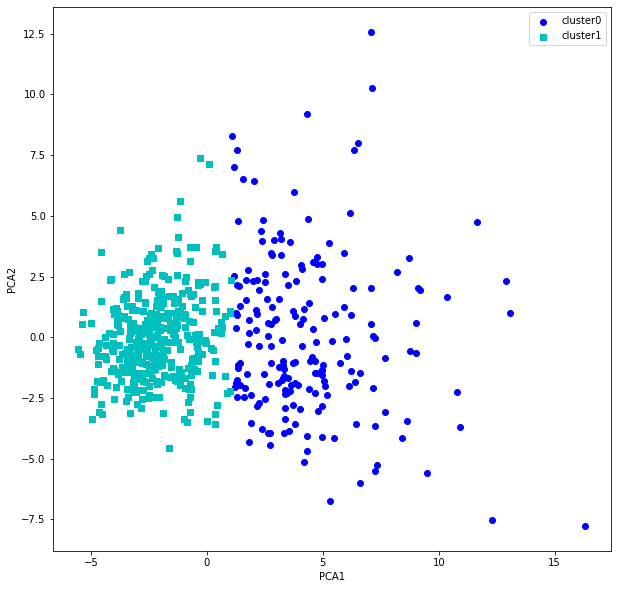

In [116]:
plt.rcParams["figure.figsize"] = (10,10)
markers = ["ob","sc"]
for i, marker in enumerate(markers):
  x_data = df_k[df_k["cluster"] == i]["PC1"]
  y_data = df_k[df_k["cluster"] == i]["PC2"]
  plt.scatter(x_data, y_data, marker = marker[:1], c = marker[1:2], label = f"cluster{i}")
plt.legend()
plt.xlabel("PCA1"), plt.ylabel("PCA2")
plt.show()


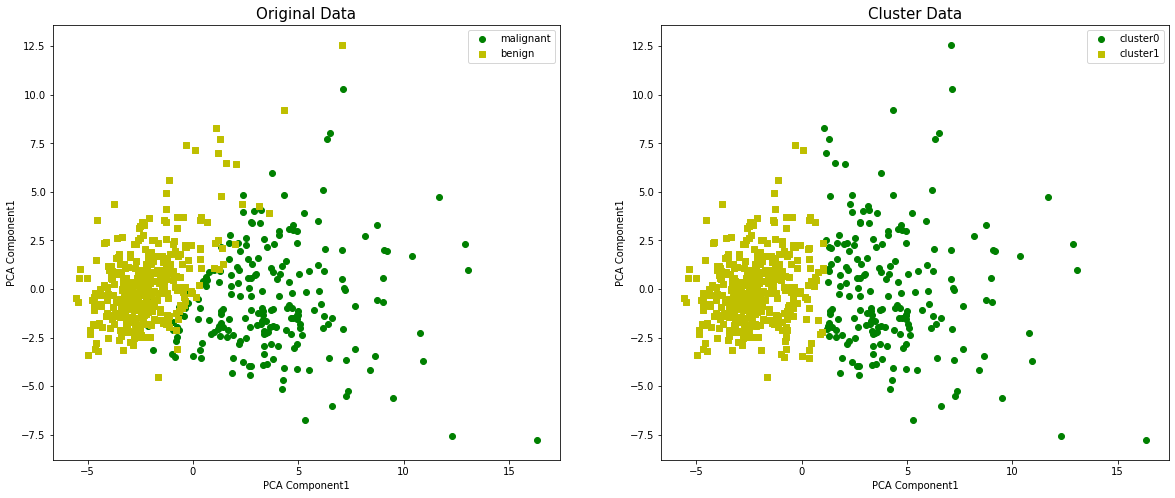

In [118]:
plt.figure(figsize=(20,8))
markers = ["og","sy"]

for k, column in enumerate(["target","cluster"]):
  plt.subplot(1,2, k+1)
  for i, marker in enumerate(markers):
    x_data = df_k[df_k[column] == i]["PC1"]
    y_data = df_k[df_k[column] == i]["PC2"]
    if k ==0:
      plt.title("Original Data", fontsize = 15)
      plt.scatter(x_data, y_data, marker = marker[:1], c = marker[1:2], label = cancer.target_names[i])
    else : 
      plt.title("Cluster Data", fontsize = 15)
      plt.scatter(x_data, y_data, marker = marker[:1], c = marker[1:2], label = "cluster" + str(i))
  plt.legend()
  plt.xlabel("PCA Component1"), plt.ylabel("PCA Component1")
plt.show()
